# 6.5 Unsupervised Machine Learning - Clustering

### Content List:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

#Remove scientific notation
pd.options.display.float_format='{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
#Create data path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A6\24-03-2024 TransferMarkt'

In [4]:
#import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'big5leagues_wrangled.pkl'))

In [6]:
df.shape

(460206, 26)

In [5]:
df.head()

,player_id,player_name,date_of_birth,age,country_of_citizenship,country_of_citizen#,position,position#,sub_position,sub_position#,...,highest_market_value_in_eur,competition_name,competition_country,comp_countries#,date,domestic_league_code,club_name,club_name#,current_club_country,current_league
29,26267,Fernandinho,1985-05-04,38,Brazil,11,Midfield,2,Defensive Midfield,4,...,32000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,United Kingdom,Premier League
39,55735,Henrikh Mkhitaryan,1989-01-21,35,Armenia,5,Midfield,2,Central Midfield,3,...,37000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,Italy,Serie A
48,75615,Douglas Costa,1990-09-14,33,Brazil,11,Attack,3,Right Winger,9,...,55000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,Italy,Serie A
101,73185,Lucas Pérez,1988-09-10,35,Spain,104,Attack,3,Centre-Forward,2,...,17000000,premier-liga,Ukraine,15,2012-07-13,UKR1,Karpaty Lviv (-2021),180,Spain,La Liga
289,42678,Salvatore Bocchetti,1986-11-30,37,Italy,59,Defender,1,Centre-Back,1,...,14000000,russian-super-cup,Russia,11,2012-07-14,RU1,FC Rubin Kazan,113,Italy,Serie A


In [7]:
df['current_country_club'].value_counts()

KeyError: 'current_country_club'

In [7]:
#Delete columns not necessary for anaysis
big5_df = df.drop (columns = [ 'player_id','position','sub_position','country_of_citizen#', 'position#', 'sub_position#',
                              'foot#', 'current_club_name#','country_of_citizenship', 'foot','current_club_name', 
                              'last_season','comp_countries#','club_name#','competition_name','competition_country', 'date',
                              'domestic_league_code','club_name','current_club_country', 'current_league','player_name', 
                              'date_of_birth'])

In [8]:
big5_df.columns

Index(['age', 'market_value_in_eur', 'highest_market_value_in_eur'], dtype='object')

In [9]:
big5_df.head()

,age,market_value_in_eur,highest_market_value_in_eur
29,38,600000,32000000
39,35,6000000,37000000
48,33,1500000,55000000
101,35,800000,17000000
289,37,200000,14000000


### 2. The elbow technique

In [10]:
num_cl = range(1, 11) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(big5_df).score(big5_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[-5.079893899762664e+20,
 -2.196940246896396e+20,
 -1.4004579705537325e+20,
 -1.0924914790049833e+20,
 -8.835918735284335e+19,
 -7.2753763672103125e+19,
 -5.636232238118447e+19,
 -4.523242981203624e+19,
 -3.92663589704338e+19,
 -3.4384663589732663e+19]

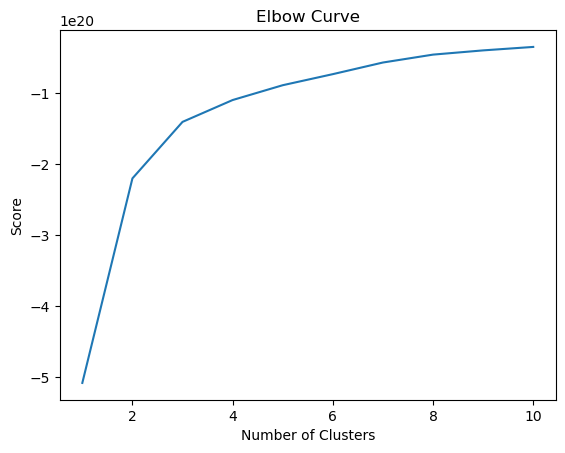

In [12]:
# Plot the elbow curve using PyLab.
num_cl = range(1, 11)  # Adjust the range to include 10 clusters
pl.plot(num_cl, score[:10])  # Use only the first 10 elements of score
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for my cluster is three because the curve starts to strighen out ater three

### 3. k-means clustering

In [13]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_init=10) 

In [14]:
kmeans.fit(big5_df)

KMeans(n_clusters=3, n_init=10)

In [15]:
big5_df['clusters'] = kmeans.fit_predict(big5_df)

In [16]:
big5_df.head()

,age,market_value_in_eur,highest_market_value_in_eur,clusters
29,38,600000,32000000,0
39,35,6000000,37000000,1
48,33,1500000,55000000,1
101,35,800000,17000000,0
289,37,200000,14000000,0


In [17]:
big5_df['clusters'].value_counts()

clusters
0    328107
1    109002
2     23097
Name: count, dtype: int64

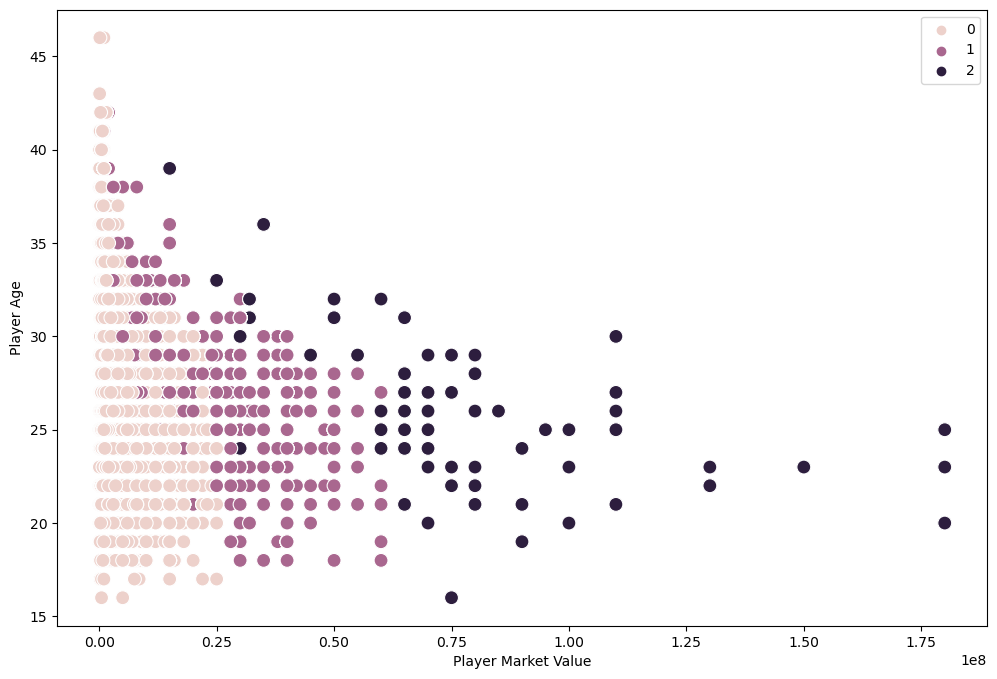

In [18]:
# Plot the clusters for the 'Player Market Value' and 'Player Age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['market_value_in_eur'], y=df['age'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Market Value')
plt.ylabel('Player Age')
plt.show()

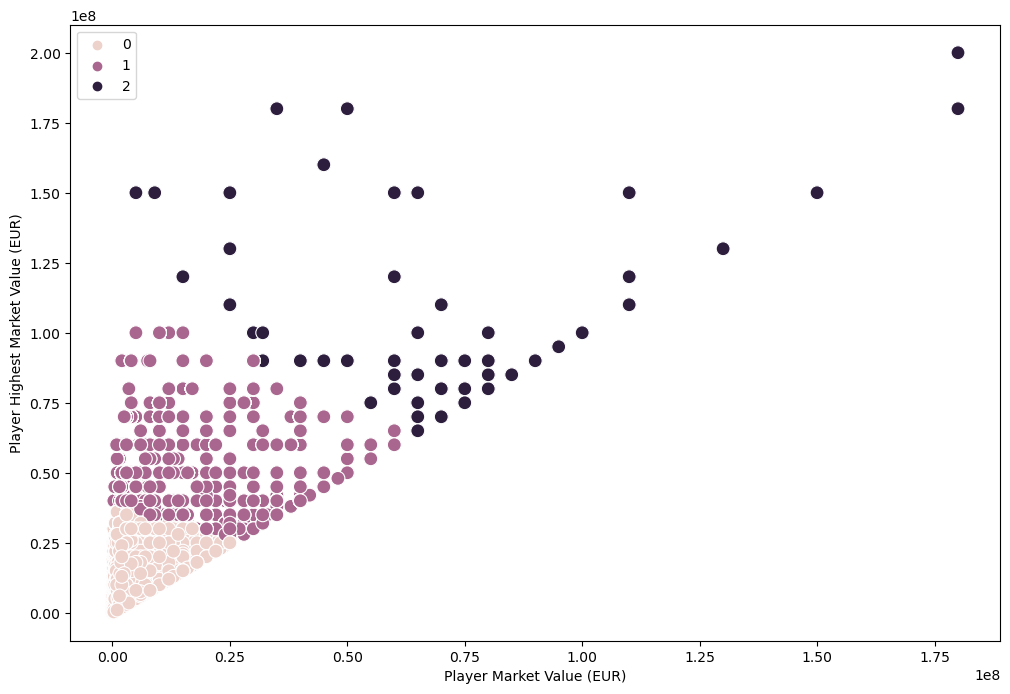

In [19]:
# Plot the clusters for the 'Player Market Value (EUR)' and 'Player Highest Market Value (EUR)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['market_value_in_eur'], y=df['highest_market_value_in_eur'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Market Value (EUR)')
plt.ylabel('Player Highest Market Value (EUR)')
plt.show()

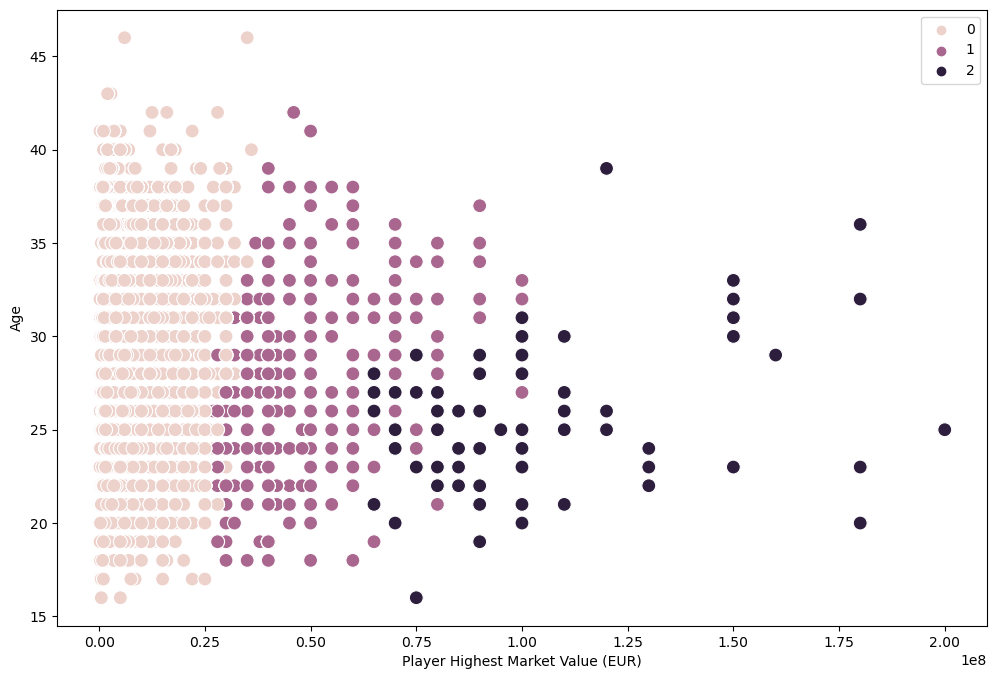

In [21]:
# Plot the clusters for the 'Player Highest Market Value (EUR)' and 'Player Age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['highest_market_value_in_eur'], y=df['age'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Highest Market Value (EUR)')
plt.ylabel('Age')
plt.show()

In [23]:
big5_df.groupby('clusters').agg({'age':['mean', 'median'], 
                         'market_value_in_eur':['mean', 'median'], 
                         'highest_market_value_in_eur':['mean', 'median'],})

age         market_value_in_eur                \
            mean  median                mean        median   
clusters                                                     
0        30.1642 30.0000        4990092.3327  3000000.0000   
1        29.1280 29.0000       21595894.5707 20000000.0000   
2        27.4621 27.0000       66883751.1365 65000000.0000   

         highest_market_value_in_eur                 
                                mean         median  
clusters                                             
0                      13245453.4649  12000000.0000  
1                      50793847.8193  50000000.0000  
2                     107166298.6535 100000000.0000

Age doesn't have any major impact on market value. The above summary shows the different phases of a player's market value throughout their career. 
Cluster 0 holds players in the early and end phases of their careers in Market Value (early phase = upward movement of the market value; & end phase = the downward movement of their market value as their career ends) the average of 30 is an indication  that these two age phases are present within the cluster 0. from age 30 player market value start to decrease at an increased rate.
Cluster 1 holds players within the growth part of their journey as well as some peak market value points for some players.
Cluster 3 holds the 'cream of the crop' players within the climax of their careers.

Age has proved to not be very influencial in predicting player Market Value. The next analysis phase would be to use catagorical data (position, foot, club history, etc) to test their influence on a players market value.